In [ ]:
!wget -q https://archive.ics.uci.edu/static/public/1/abalone.zip
!unzip -q abalone.zip

In [ ]:
# check installed version
!pip install --pre pycaret
import pycaret
pycaret.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.5 MB/s e

'3.2.0'

In [ ]:
import pandas as pd
indy = pd.read_csv('Index')
indy

,Index of abalone
0,02 Dec 1996 114 Index
1,12 Jun 1996 191873 abalone.data
2,12 Jun 1996 4319 abalone.names


In [ ]:
dataSet = pd.read_csv('abalone.data')
dataSet

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from pycaret.classification import *
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# import pycaret classification and init setup
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

And now here's the part where we get to find out which data works.


In [ ]:
abalone = pd.read_csv('data.csv')
abalone.columns=['Sex','Length','Diameter','Height','Whole weight',
                 'Shucked weight','Viscera weight',
                 'Shell weight','Rings']
abalone.sample(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4100,F,0.675,0.520,0.175,1.4940,0.7365,0.3055,0.370,9
2219,F,0.485,0.375,0.145,0.5885,0.2385,0.1155,0.190,13
2604,F,0.620,0.485,0.175,1.2155,0.5450,0.2530,0.345,10
1175,M,0.640,0.515,0.165,1.3690,0.6320,0.3415,0.358,10
86,M,0.625,0.465,0.140,1.1950,0.4825,0.2050,0.400,13
3710,M,0.685,0.535,0.175,1.4320,0.6370,0.2470,0.460,11
276,F,0.660,0.530,0.185,1.3485,0.4930,0.2450,0.490,12
1777,I,0.485,0.345,0.160,0.8690,0.3085,0.1850,0.319,9
1380,M,0.625,0.455,0.170,1.0820,0.4955,0.2345,0.315,9
4146,M,0.695,0.530,0.210,1.5100,0.6640,0.4095,0.385,10


In [ ]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


One of the required tasks for classification is to use labels in order to analyze differences in the data sets. Here are some examples that are created and seen when done.


In [ ]:
from pycaret.internal.preprocess.transformers import CleanColumnNames
CleanColumnNames(abalone)

CleanColumnNames(match=     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns])

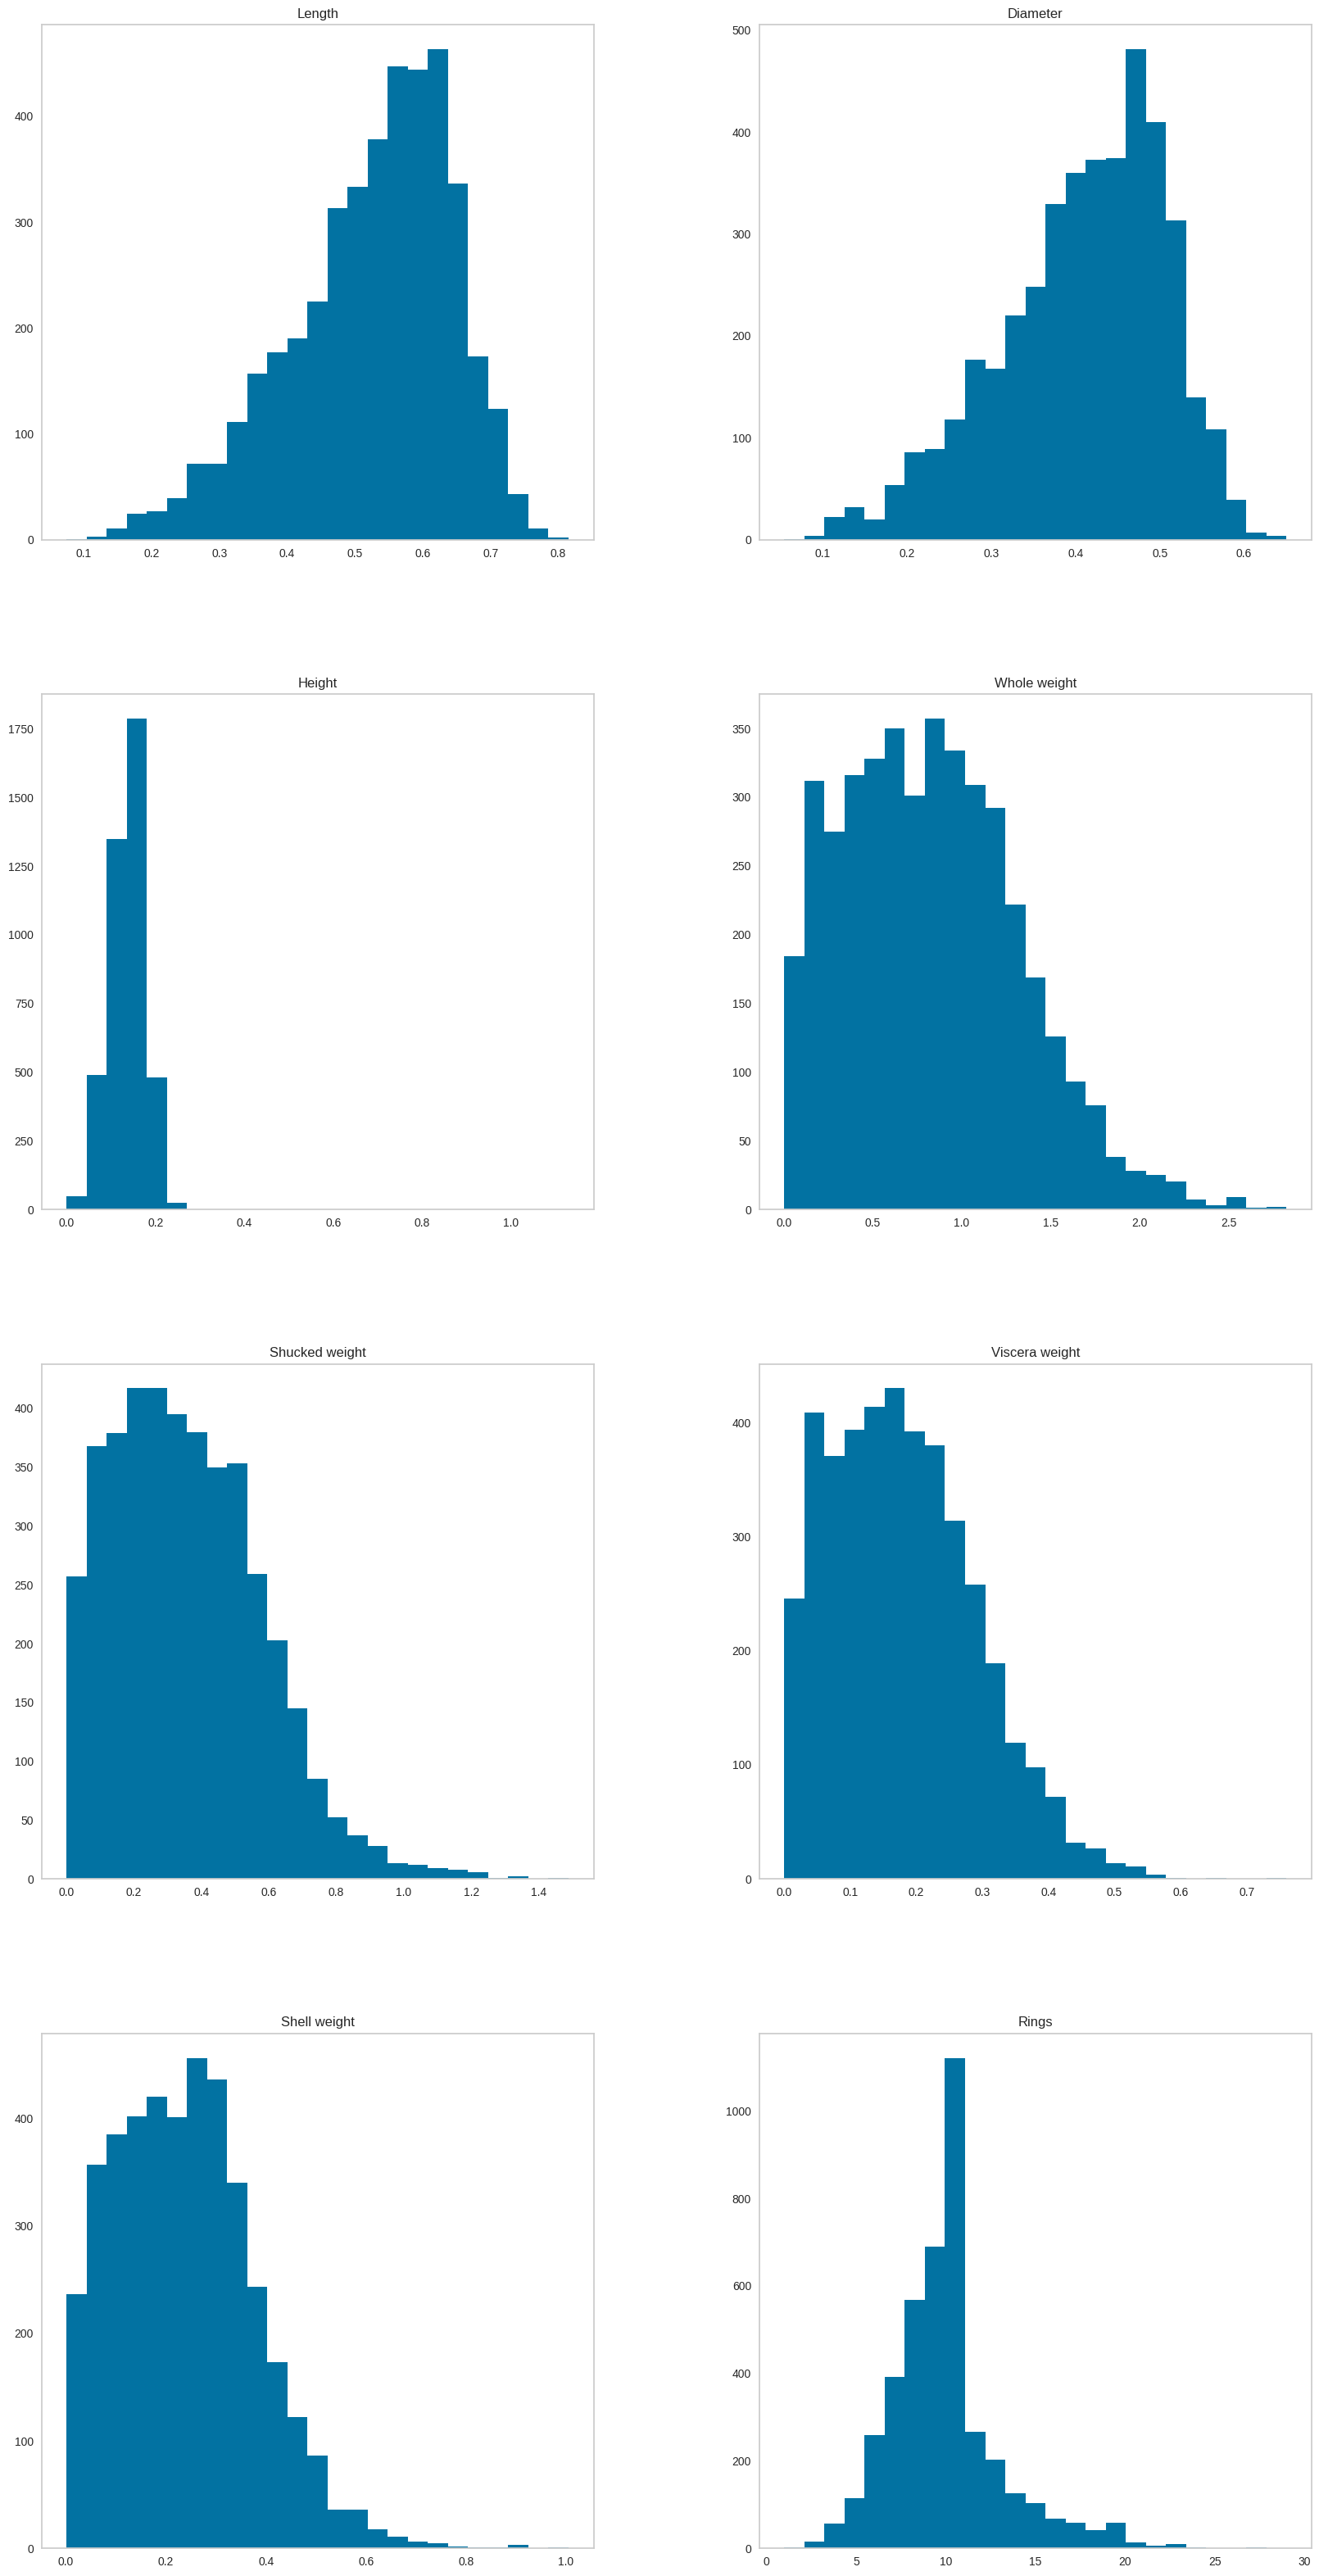

In [ ]:
abalone.hist(figsize=(20,40), grid = False, layout=(4,2), bins = 25);



Histograms show a high level of data in the middle, it will be a good idea to measure what is in the midddle and what has the highest level for each category.

Outliers in the histograms are possible but it doesn't appear to be any so this is expected. There appears to be more weights and diameters and lengths. There might be a strong relationship between the Diameter and Lenght and between Shell weight, Shucked weight Viscera weight and Whole weight.


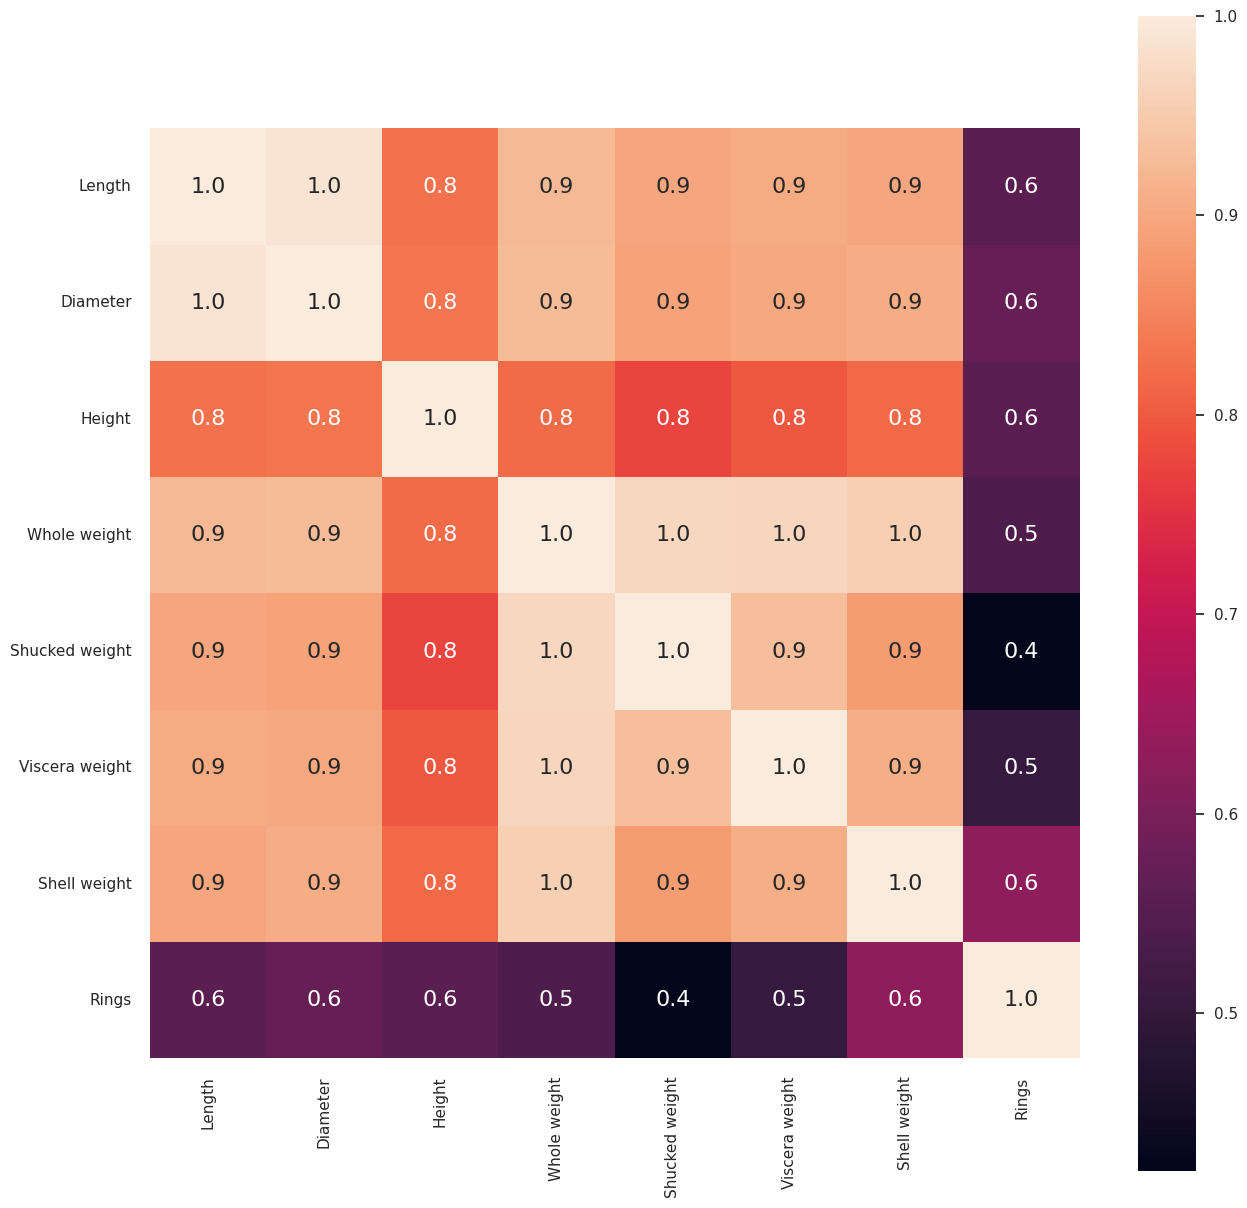

In [ ]:
import numpy as np
nf = abalone.select_dtypes(include=[np.number]).columns
cf = abalone.select_dtypes(include=[np.object]).columns

# plot confusion matrix
correlMatrix = abalone.corr()
cols = correlMatrix.nlargest(4, 'Rings')['Rings'].index
cm = np.corrcoef(abalone[nf].values.T)
sns.set(font_scale=1)
plt.figure(figsize=(15,15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 fmt='.1f', annot_kws={'size': 16}, yticklabels=nf.values,
                 xticklabels=nf.values)
plt.show();
#Confusion Matrix of all the characteristics and data given and presented using color

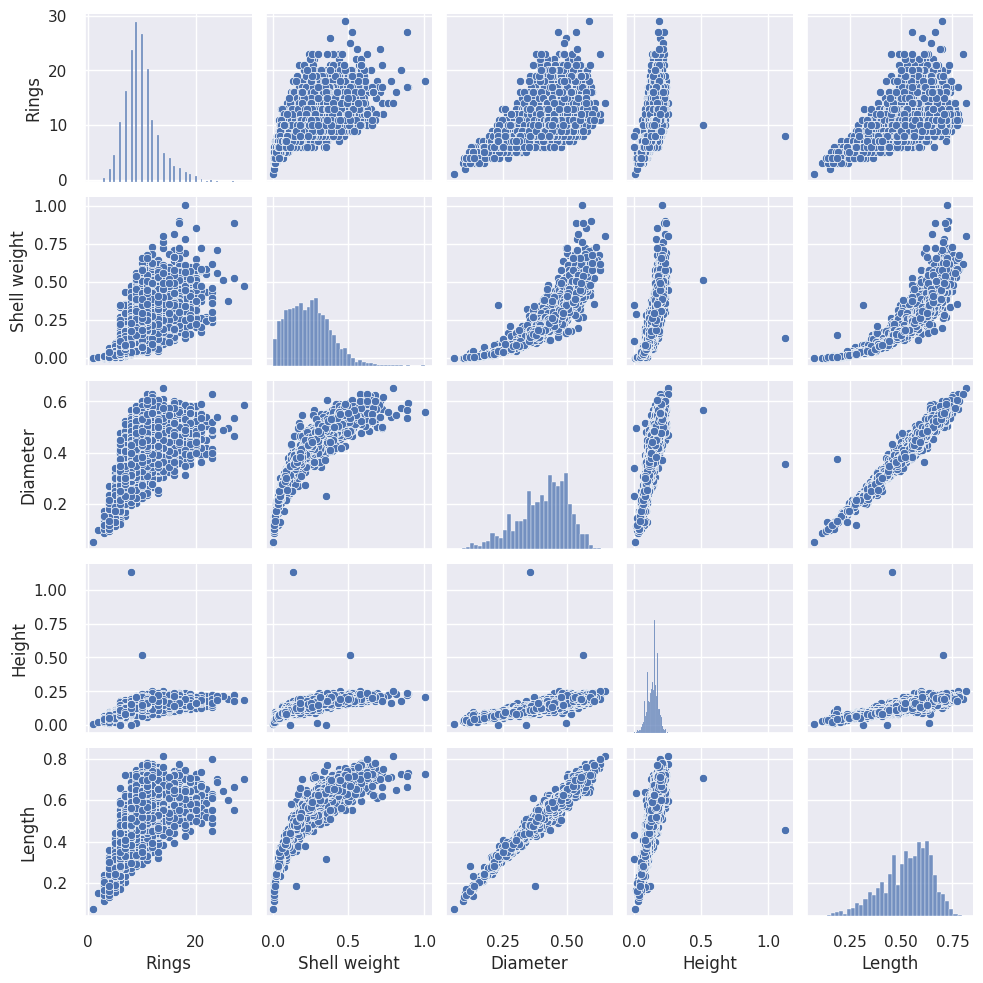

In [ ]:
cols = ['Rings','Shell weight','Diameter','Height','Length']
sns.pairplot(abalone[cols],size=2,kind='scatter')
plt.show()

The graphs above state how Rings, Shell Weight, Diameter, Height, and Length all correspond to the


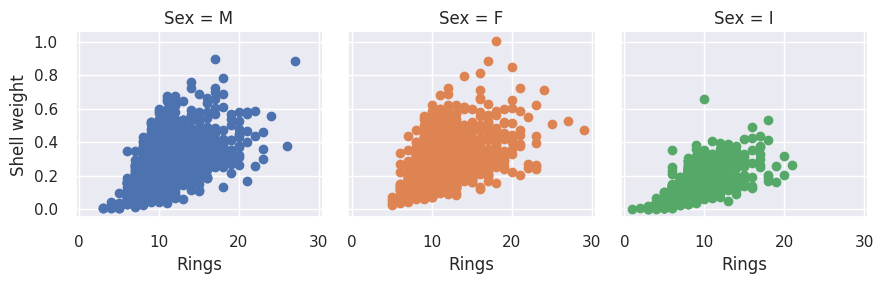

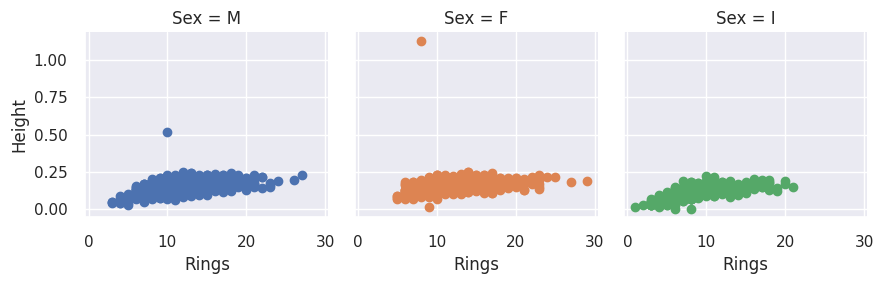

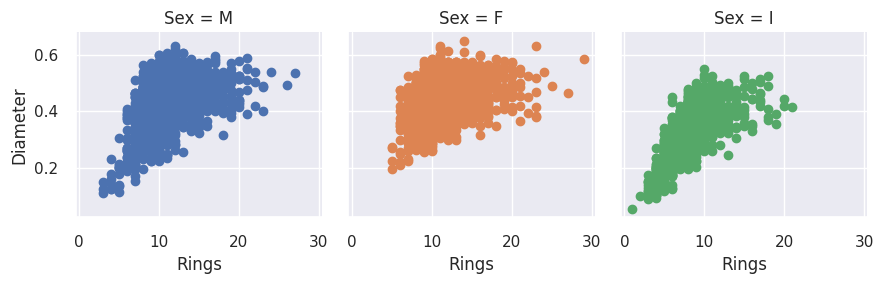

In [ ]:
p = sns.FacetGrid(abalone, col="Sex", hue="Sex")
p.map(plt.scatter,"Rings", "Shell weight")
q = sns.FacetGrid(abalone, col="Sex", hue="Sex")
q.map(plt.scatter,"Rings", "Height")
r = sns.FacetGrid(abalone,col="Sex",hue="Sex")
r.map(plt.scatter, "Rings", "Diameter")

In [ ]:
from sklearn.model_selection import train_test_split
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()
type(exp)
s = setup(abalone, target = 'Sex', session_id = 1)

dataTrain = abalone.sample(frac=0.9, random_state=400)
dataTrain.shape

#Parameter setup, here sex and prediction analysis is done and laid out
targetCSV  = 'abalone'
targetClass = 'Sex'
PredictionLabel = 'All'
displayBool = True
randSeed = 9
numModels = 4
if targetCSV == 'abalone':
  df = pd.read_csv('data.csv')

#Load Label where Settings are M, F, and I
if targetCSV == 'abalone' and PredictionLabel == 'M': #If classifing Male mainly
  df['Sex'] = df['Sex'].replace(['F','I'],"N")
if targetCSV == 'abalone' and PredictionLabel == 'F': #If classifing Female mainly
  df['Sex'] = df['Sex'].replace(['M','I'],"N")
if targetCSV == 'abalone' and PredictionLabel == 'I': #If classifing Infant regardless of gender
  df['Sex'] = df['Sex'].replace(['M','F'],"N")

print(df['Sex'])

trainValData, testData = train_test_split(df, test_size=0.2, random_state=randSeed)
print(trainValData.shape, testData.shape)

#Mapping the output, we see that Female = 0,   Infant = 1,  and Male = 2
#Also for training and testing I am doing 80% = Train and 20% = Test
#The 60/20/20 or 70/20/10 or 80/10/10 are some possible tests that are done.

#Now to create the classifier, I am using the estimators and simple functions
#provided and use the paramters to create the
clf = setup(data = trainValData,
            target = targetClass,
            session_id = randSeed,
            train_size = 0.8,
            preprocess=True,
            normalize=True,
            normalize_method='minmax',
            # I can use these options: ['zscore','minmax','maxabs', 'robust']
            # These are used on normalize_methods component

            #Now to generate Feature Engineering
            polynomial_features= True,
            polynomial_degree = 3,
            fix_imbalance= True,
            )
print(clf)

,Description,Value
0,Session id,1
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 9)"
5,Transformed data shape,"(4177, 9)"
6,Transformed train set shape,"(2923, 9)"
7,Transformed test set shape,"(1254, 9)"
8,Numeric features,8
9,Preprocess,True


0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object
(3341, 9) (836, 9)


,Description,Value
0,Session id,9
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(3341, 9)"
5,Transformed data shape,"(3627, 165)"
6,Transformed train set shape,"(2958, 165)"
7,Transformed test set shape,"(669, 165)"
8,Numeric features,8
9,Preprocess,True


In [ ]:
#Check best Available moodels and use that for data set
bestModel = compare_models(sort = 'Accuracy', n_select = numModels)
print(bestModel)
bestModel = blend_models(estimator_list=bestModel, optimize='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.5520,0.0000,0.5520,0.5463,0.5299,0.3346,0.3459,0.2060
lightgbm,Light Gradient Boosting Machine,0.5513,0.7345,0.5513,0.5486,0.5481,0.3269,0.3282,16.2910
et,Extra Trees Classifier,0.5498,0.7344,0.5498,0.5455,0.5461,0.3242,0.3251,1.2000
xgboost,Extreme Gradient Boosting,0.5494,0.7288,0.5494,0.5470,0.5468,0.3237,0.3246,6.2130
rf,Random Forest Classifier,0.5483,0.7360,0.5483,0.5448,0.5447,0.3229,0.3241,3.2850
lr,Logistic Regression,0.5472,0.7558,0.5472,0.5405,0.5263,0.3275,0.3379,0.9430
gbc,Gradient Boosting Classifier,0.5419,0.7398,0.5419,0.5354,0.5344,0.3149,0.3175,37.4340
lda,Linear Discriminant Analysis,0.5419,0.7316,0.5419,0.5362,0.5381,0.3118,0.3123,0.4430
ada,Ada Boost Classifier,0.5348,0.7140,0.5348,0.5319,0.5253,0.3063,0.3113,2.5030
svm,SVM - Linear Kernel,0.5296,0.0000,0.5296,0.4869,0.4567,0.3086,0.3496,0.3400


Processing:   0%|          | 0/68 [00:00<?, ?it/s]

[RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=9, solver='auto',
                tol=0.0001), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=9, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0), ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5784,0.0000,0.5784,0.5750,0.5669,0.3722,0.3792
1,0.5448,0.0000,0.5448,0.5365,0.5291,0.3223,0.3291
2,0.5318,0.0000,0.5318,0.5365,0.5240,0.3036,0.3100
3,0.5918,0.0000,0.5918,0.5878,0.5778,0.3928,0.4013
4,0.5019,0.0000,0.5019,0.4951,0.4960,0.2550,0.2564
5,0.5581,0.0000,0.5581,0.5580,0.5525,0.3406,0.3447
6,0.5393,0.0000,0.5393,0.5249,0.5209,0.3139,0.3207
7,0.5880,0.0000,0.5880,0.5947,0.5793,0.3868,0.3958
8,0.5730,0.0000,0.5730,0.5681,0.5597,0.3645,0.3721


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

From what I can see, Gradient Booster is what appears to work really well. Hoever, the average mean is not high when predicting the data. Accuracy is not the best as it is still less thatn 60%.

In [ ]:
# Classification is done, but now to tune the model
bestModel = tune_model(bestModel, optimize ='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5896,0.0000,0.5896,0.5864,0.5871,0.3844,0.3850
1,0.5373,0.0000,0.5373,0.5255,0.5275,0.3062,0.3084
2,0.5468,0.0000,0.5468,0.5461,0.5455,0.3204,0.3210
3,0.5955,0.0000,0.5955,0.5909,0.5880,0.3960,0.3998
4,0.4944,0.0000,0.4944,0.4916,0.4926,0.2375,0.2377
5,0.5655,0.0000,0.5655,0.5630,0.5626,0.3492,0.3503
6,0.5543,0.0000,0.5543,0.5418,0.5424,0.3336,0.3372
7,0.5768,0.0000,0.5768,0.5827,0.5771,0.3663,0.3683
8,0.5543,0.0000,0.5543,0.5514,0.5524,0.3312,0.3316


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


So comparing the orignal model to the tuned model, original seems to have better prediction, but tuned also got really close. Fine tuning makes adjustments to balance out the data to make it easier to classify.


In [ ]:
#Ensemble Model
#This is where the tuned model gets ensembled
if numModels == 1:
  bestModel = ensemble_model(estimator=bestModel)

#Model Information
evaluate_model(bestModel)

finalModel = finalize_model(bestModel)

#Overall Information and collated materials for test_data are now here:
predictions = predict_model(finalModel, data=testData)
print(predictions)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Get the actual labels
actualLabels = testData[targetClass]
# The target class, which is the sex/gender that we arre looking for is important to our search

# Get the predicted labels from the predictions DataFrame
predictedLabels = predictions['prediction_label']

# Calculate various performance metrics
accuracy = accuracy_score(actualLabels, predictedLabels)
precision = precision_score(actualLabels, predictedLabels, average='weighted')
recall = recall_score(actualLabels, predictedLabels, average='weighted')
f1 = f1_score(actualLabels, predictedLabels, average='weighted')

# Print the performance metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

from sklearn.metrics import confusion_matrix, classification_report

confMatrix = confusion_matrix(actualLabels, predictedLabels)
answer = classification_report(actualLabels, predictedLabels)

print("\nConfusion Matrix:")
print(confMatrix)
print("\nClassification Report:")
print(answer)

#After working on the models, save the final parts and be able to
#present them
save_model(finalModel, 'abalone_model')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.5694,0,0.5694,0.5636,0.5651,0.3549,0.3558


      Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
891    0.730     0.595   0.230        2.8255          1.1465          0.4190   
2635   0.430     0.320   0.100        0.3465          0.1635          0.0800   
1294   0.520     0.395   0.125        0.6630          0.3005          0.1310   
1517   0.665     0.515   0.180        1.3890          0.5945          0.3240   
1002   0.595     0.460   0.140        1.0045          0.4655          0.2095   
...      ...       ...     ...           ...             ...             ...   
903    0.315     0.235   0.075        0.1485          0.0585          0.0375   
803    0.370     0.275   0.100        0.2200          0.0940          0.0450   
2142   0.460     0.350   0.110        0.3945          0.1685          0.0865   
3320   0.535     0.425   0.155        0.7765          0.3020          0.1565   
786    0.515     0.390   0.130        0.5755          0.1975          0.1300   

      Shell_weight  Rings Sex predictio

(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Length', 'Diameter', 'Height',
                                              'Whole_weight', 'Shucked_weight',
                                              'Viscera_weight', 'Shell_weight',
                                              'Rings'],
                                     transformer=SimpleImputer(add_indicato...
                                                              max_cat_to_onehot=None,
                                                              max_delta_step=None,
                                                              max_depth=None,
                                                            

Below this section, is just other notes and tests that are unrelated to the project itself, just personal tests.